<a href="https://colab.research.google.com/github/alco-technics/investment-simulator/blob/main/compound_interest_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** [複利計算シミュレーション] **

In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 4.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=9ea88131f8ea463cd32e997cde01ba3aac4fc888bb020c56dc85917fb6511456
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib 

In [ ]:
## 年率を計算
def get_rate_list(avg, stdev, year):
  return np.random.normal(loc = avg, scale = stdev, size = year) # 年率の配列

In [ ]:
# 単利計算
def calc_simple_interest(input_total_list, rate_list):
  year = len(rate_list)
  output_total_list = []
  benefit_total = 0
  # 1年ごとの結果
  for i in range(year):
    input_ = input_total_list[i]
    rate_ = rate_list[i]

    output_ = input_ * (1 + rate_ * 0.01)

    output_total_list.append(output_ + benefit_total)
    benefit_total += (output_ - input_) # 利益はプールする
  return output_total_list

In [ ]:
# 複利計算
def calc_compound_interest(input_total_list, rate_list):
  year = len(rate_list)
  output_total_list = []
  compound_input_total_list = []
  benefit_ = 0
  # 1年ごとの結果
  for i in range(year):
    input_ = input_total_list[i]
    rate_ = rate_list[i]

    output_ = (input_ + benefit_) * (1 + rate_ * 0.01)   # 利益を元本に追加

    output_total_list.append(output_)
    
    benefit_ = (output_ - input_) # 利益は元本に回す
    compound_input_total_list.append(input_)
  return output_total_list, compound_input_total_list

In [ ]:
# グラフ表示
def plot_values(rate_list, input_total_list, compound_output_total_list, simple_output_total_list):
  year = len(rate_list)

  fig, ax = plt.subplots(1, 2, figsize=(12.0, 4.0))

  ax[0].set_title("年率")
  ax[0].set_xlabel("年数")
  ax[0].set_xticks(range(year))
  ax[0].set_xlim(0, year)
  ax[0].set_ylabel("利率[%]")
  ax[0].set_ylim(min(rate_list) - 1, max(rate_list) + 1)
  ax[0].plot(range(year), rate_list, marker="o")

  ax[1].set_title("資産")
  ax[1].set_xlabel("年数")
  ax[1].set_xticks(range(year))
  ax[1].set_xlim(0, year)
  ax[1].set_ylabel("総額[万円]")
  # ax[1].set_ylim(min(compound_output_list), max(compound_output_list))
  ax[1].plot(range(year), input_total_list, marker="o", color="green", label="入金総額") # 入金総額
  ax[1].plot(range(year), simple_output_total_list, marker="o", color="red", label="結果総額(単利)") # 結果総額(単利)
  ax[1].plot(range(year), compound_output_total_list, marker="o", color="blue", label="結果総額(複利)") # 結果総額(複利)
  ax[1].legend()

In [ ]:
## シミュレーション実行関数
# capital_input_list : 年ごとの入金額
# year : 運用年数
# avg : 運用ファンドの平均年利
# stdev : 運用ファンドの年利の標準偏差(高いほど、高リスク)
def exec_simulation(capital_input_list, year, avg, stdev, view_flg = True):
  # 運用中の年利を計算する
  year_rate_list = get_rate_list(avg, stdev, year)

  # 年ごとの積み立てた入金総額を計算する
  input_total_list = [sum(capital_input_list[:i+1]) for i in range(len(capital_input_list))]

  # 運用結果を計算する
  simple_output_total_list = calc_simple_interest(input_total_list, year_rate_list) # 単利計算
  compound_output_total_list, compound_input_total_list = calc_compound_interest(input_total_list, year_rate_list) # 複利計算
  
  # print(input_total_list)
  # print(simple_output_total_list)
  # print(compound_input_total_list)
  # print(compound_output_total_list)

  if view_flg:
    print("結果…")
    print("入金総額...{}万円".format(input_total_list[-1]))
    print("単利の場合...{}万円".format(int(simple_output_total_list[-1])))
    print("複利の場合...{}万円".format(int(compound_output_total_list[-1])))
    plot_values(year_rate_list, input_total_list, compound_output_total_list, simple_output_total_list)

  return year_rate_list, input_total_list, simple_output_total_list, compound_output_total_list

40万円が20年後にどうなるのかシミュレーション...
結果…
入金総額...40万円
単利の場合...64万円
複利の場合...72万円


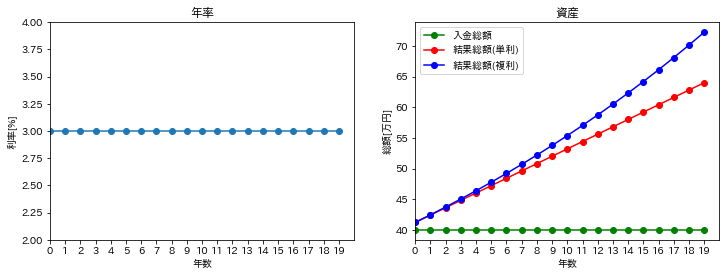

In [ ]:
## 積立NISAのシミュレーション
# "最初の1年だけ"満額40万円を運用してみた。
# 積立ファンドの成績は、平均年率3%, 標準偏差0%とする。
print("40万円が20年後にどうなるのかシミュレーション...")

rate_avg = 3.0
rate_stdev = 0.0
invest_year = 20

capital_input_list = [0] * invest_year
capital_input_list[0] = 40 # 最初の1年だけ満額40万円使ってみた。

_ = exec_simulation(capital_input_list, invest_year, rate_avg, rate_stdev)

結果…
入金総額...800万円
単利の場合...1052万円
複利の場合...1107万円


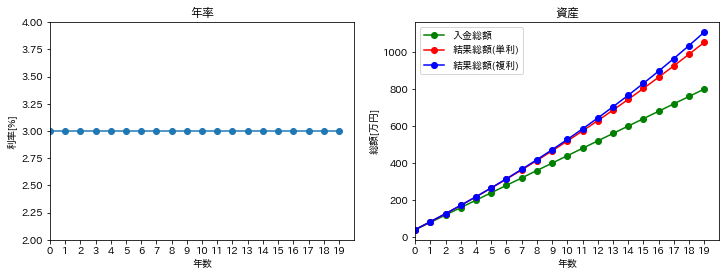

In [ ]:
## 積立NISAのシミュレーション
# 毎年40万円を20年間運用してみた。
# 積立ファンドの成績は、平均年率3%, 標準偏差0%とする。
rate_avg = 3.0
rate_stdev = 0.0
invest_year = 20

capital_input_list = [40] * invest_year
_ = exec_simulation(capital_input_list, invest_year, rate_avg, rate_stdev)

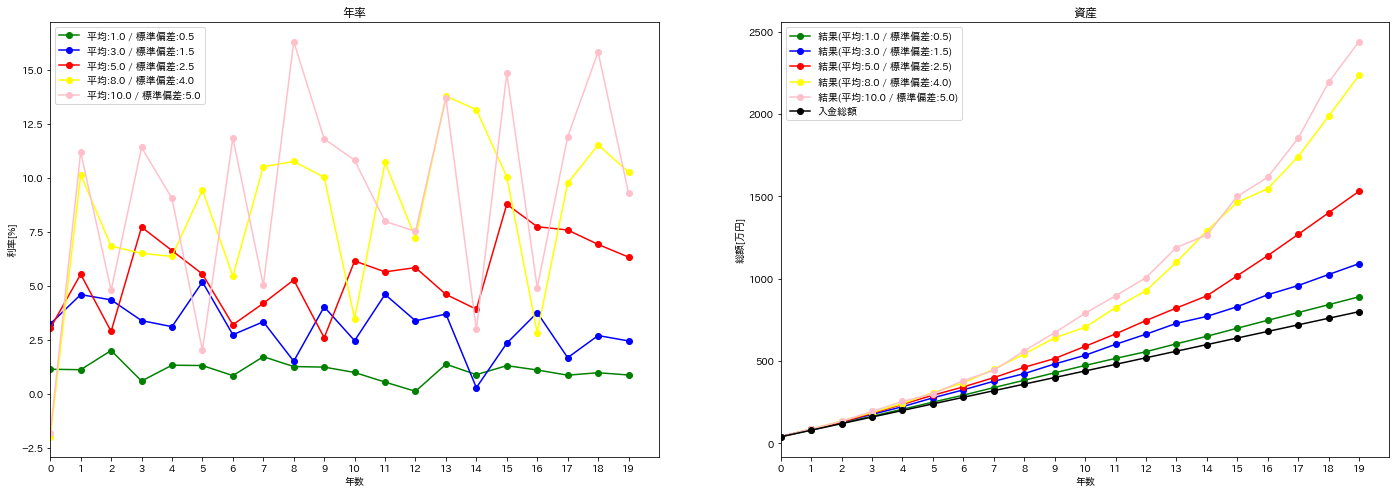

In [ ]:
## 積立NISAのシミュレーション
# 毎年40万円を20年間運用してみた。
# 平均年率や標準偏差を変えてみる。
rate_avg = [1.0, 3.0, 5.0, 8.0, 10.0]
rate_stdev = [0.5, 1.5, 2.5, 4.0, 5.0]
invest_year = 20

capital_input_list = [40] * invest_year

rate_list = []
compound_result_list = []

input_total_list = [sum(capital_input_list[:i+1]) for i in range(len(capital_input_list))]

fig, ax = plt.subplots(1, 2, figsize=(24.0, 8.0))
colors = ["green", "blue", "red", "yellow", "pink"]

for i in range(len(rate_avg)):
  avg_ = rate_avg[i]
  stdev_ = rate_stdev[i]

  # シミュレーションを実行
  year_rate_list, _, _, compound_result_ = exec_simulation(capital_input_list, invest_year, avg_, stdev_, view_flg = False)
  
  # 結果を表示
  ax[0].set_title("年率")
  ax[0].set_xlabel("年数")
  ax[0].set_xticks(range(invest_year))
  ax[0].set_xlim(0, invest_year)
  ax[0].set_ylabel("利率[%]")
  # ax[0].set_ylim(min(year_rate) - 1, max(year_rate) + 1)
  ax[0].plot(range(invest_year), year_rate_list, marker="o", color=colors[i], label="平均:{} / 標準偏差:{}".format(avg_, stdev_))
  ax[0].legend()

  ax[1].set_title("資産")
  ax[1].set_xlabel("年数")
  ax[1].set_xticks(range(invest_year))
  ax[1].set_xlim(0, invest_year)
  ax[1].set_ylabel("総額[万円]")
  ax[1].plot(range(invest_year), compound_result_, marker="o", color=colors[i], label="結果(平均:{} / 標準偏差:{})".format(avg_, stdev_)) # 結果総額(複利)
  
ax[1].plot(range(invest_year), input_total_list, marker="o", color="black", label="入金総額")
ax[0].legend()
ax[1].legend()

## [数式的な計算方法]

元本a[円], 年利回りr[%], N年続けたとします。

N年間、毎年a円積み立てた場合、
N年後の総資産額は、、、

#### [単利]

1年目に積み立てたのがN年後には

a * r * N + a [円]

になります。2年目に積み立てたのがN年後には

a * r * (N - 1) + a [円]

になる計算になります。

---

#### [複利]

1年目に積み立てたのがN年後には

a * ((1 + r) ^ N) [円]

になります。 ※等比数列の和


In [16]:
## 単利計算
import math

a = 40 * 10000 # 元本
r = 0.03 # 年利
N = 20 # 年数

# 単利
simple_output = a * r * N + a

print("単利の場合… {}".format(math.floor(simple_output)))

# 複利
compound_output = a * ((1 + r) ** N)

print("複利の場合… {}".format(math.floor(compound_output)))


単利の場合… 640000
複利の場合… 722444
